1/1 [==============================] - 0s 19ms/step
Epoch: 0 Loss D.: 0.3853271007537842
Epoch: 0 Loss G.: 0.9196960926055908
1/1 [==============================] - 0s 15ms/step
Epoch: 10 Loss D.: 0.6997339129447937
Epoch: 10 Loss G.: 0.5924973487854004
1/1 [==============================] - 0s 17ms/step
Epoch: 20 Loss D.: 0.5719985365867615
Epoch: 20 Loss G.: 1.1651185750961304
1/1 [==============================] - 0s 18ms/step
Epoch: 30 Loss D.: 0.573004424571991
Epoch: 30 Loss G.: 0.941705584526062
1/1 [==============================] - 0s 27ms/step
Epoch: 40 Loss D.: 0.5482187271118164
Epoch: 40 Loss G.: 0.9816475510597229
1/1 [==============================] - 0s 20ms/step
Epoch: 50 Loss D.: 0.6478832960128784
Epoch: 50 Loss G.: 1.0157073736190796
1/1 [==============================] - 0s 20ms/step
Epoch: 60 Loss D.: 0.5444217920303345
Epoch: 60 Loss G.: 1.5536510944366455
1/1 [==============================] - 0s 21ms/step
Epoch: 70 Loss D.: 0.63633793592453
Epoch: 70 Loss G.: 0

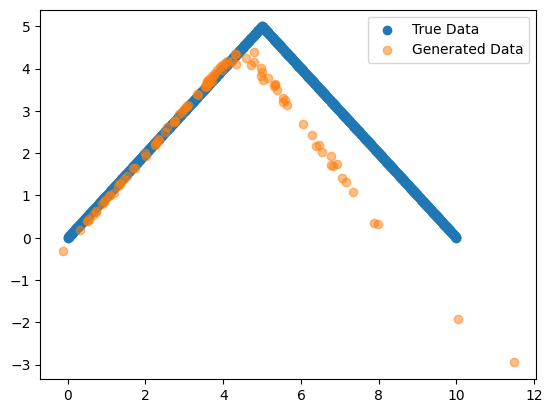

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Reshape
from tensorflow.keras.optimizers import Adam

# Function to generate true data
def true_data(n_samples):
    x = np.linspace(0, 10, n_samples)
    y = np.abs(5 - np.abs(x % 10 - 5))
    return np.column_stack((x, y))

# Discriminator model
def build_discriminator():
    model = Sequential()
    model.add(Dense(256, input_dim=2))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Generator model
def build_generator():
    model = Sequential()
    model.add(Dense(16, input_dim=2))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(2))
    return model

# Compile models
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

generator = build_generator()
discriminator.trainable = False

gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001))

# Training parameters
batch_size = 32
num_epochs = 100

# Generate true data
train_data = true_data(1024)

for epoch in range(num_epochs):
    # Shuffle and create batches
    np.random.shuffle(train_data)
    for n in range(0, len(train_data), batch_size):
        real_samples = train_data[n:n + batch_size]

        # Data for training the discriminator
        real_samples_labels = np.ones((batch_size, 1))
        latent_space_samples = np.random.randn(batch_size, 2)
        generated_samples = generator.predict(latent_space_samples)
        generated_samples_labels = np.zeros((batch_size, 1))
        all_samples = np.concatenate((real_samples, generated_samples))
        all_samples_labels = np.concatenate((real_samples_labels, generated_samples_labels))

        # Training the discriminator
        d_loss = discriminator.train_on_batch(all_samples, all_samples_labels)

        # Data for training the generator
        latent_space_samples = np.random.randn(batch_size, 2)

        # Training the generator
        g_loss = gan.train_on_batch(latent_space_samples, np.ones((batch_size, 1)))

    # Show loss
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} Loss D.: {d_loss[0]}")
        print(f"Epoch: {epoch} Loss G.: {g_loss}")

# Generate and plot synthetic samples
latent_space_samples = np.random.randn(100, 2)
generated_samples = generator.predict(latent_space_samples)

plt.scatter(train_data[:, 0], train_data[:, 1], label='True Data')
plt.scatter(generated_samples[:, 0], generated_samples[:, 1], label='Generated Data', alpha=0.5)
plt.legend()
plt.show()


1/1 [==============================] - 0s 21ms/step
Epoch: 0 Loss D.: 0.3259527385234833
Epoch: 0 Loss G.: 0.9984627366065979
4/4 [==============================] - 0s 2ms/step


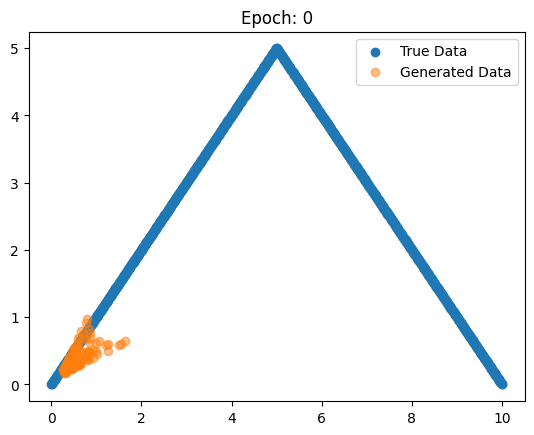

1/1 [==============================] - 0s 15ms/step
Epoch: 10 Loss D.: 0.647729754447937
Epoch: 10 Loss G.: 0.8720765709877014
4/4 [==============================] - 0s 2ms/step


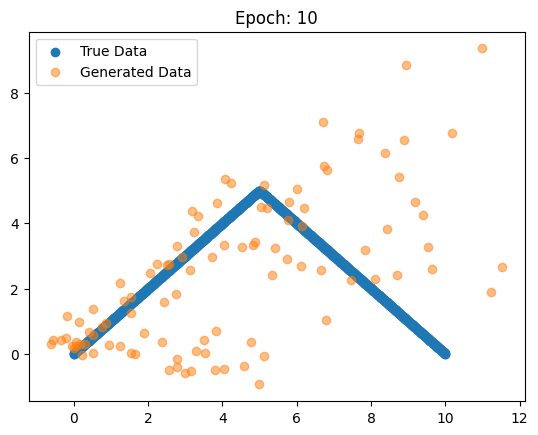

1/1 [==============================] - 0s 16ms/step
Epoch: 20 Loss D.: 0.5264828205108643
Epoch: 20 Loss G.: 1.344462275505066
4/4 [==============================] - 0s 2ms/step


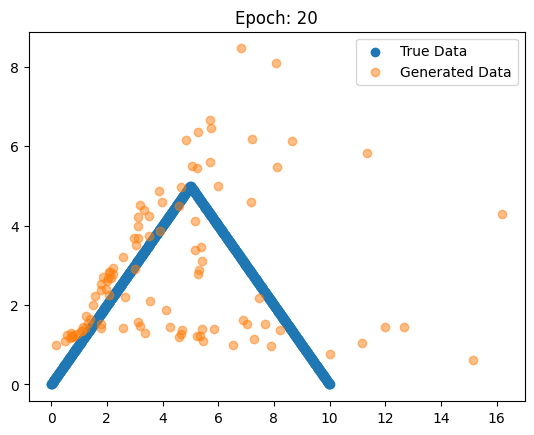

1/1 [==============================] - 0s 18ms/step
Epoch: 30 Loss D.: 0.4955320954322815
Epoch: 30 Loss G.: 1.3212189674377441
4/4 [==============================] - 0s 2ms/step


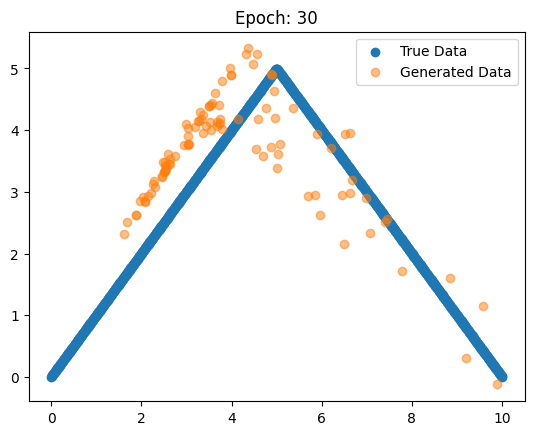

1/1 [==============================] - 0s 19ms/step
Epoch: 40 Loss D.: 0.5669752359390259
Epoch: 40 Loss G.: 0.8449741005897522
4/4 [==============================] - 0s 2ms/step


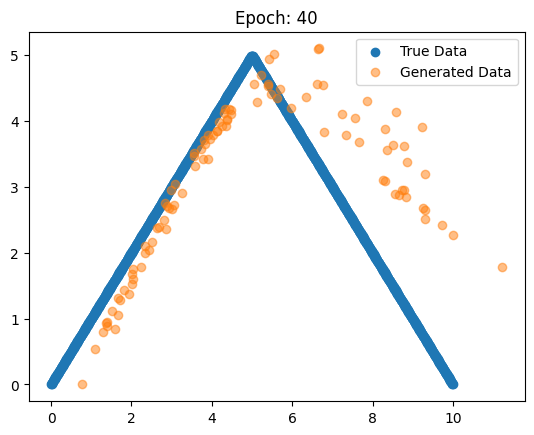

1/1 [==============================] - 0s 23ms/step
Epoch: 50 Loss D.: 0.6055193543434143
Epoch: 50 Loss G.: 1.019500732421875
4/4 [==============================] - 0s 2ms/step


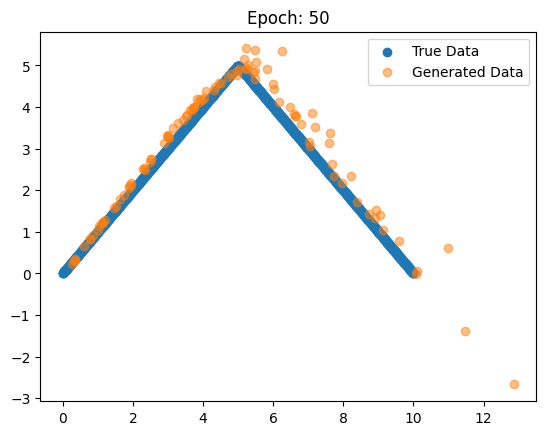

1/1 [==============================] - 0s 12ms/step
Epoch: 60 Loss D.: 0.6185858249664307
Epoch: 60 Loss G.: 0.6830203533172607
4/4 [==============================] - 0s 3ms/step


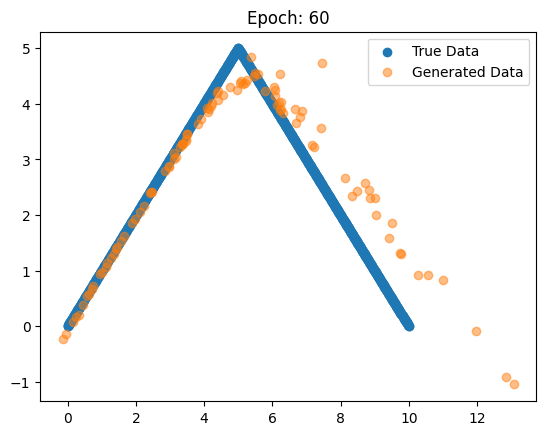

1/1 [==============================] - 0s 17ms/step
Epoch: 70 Loss D.: 0.6006177067756653
Epoch: 70 Loss G.: 0.8324298858642578
4/4 [==============================] - 0s 1ms/step


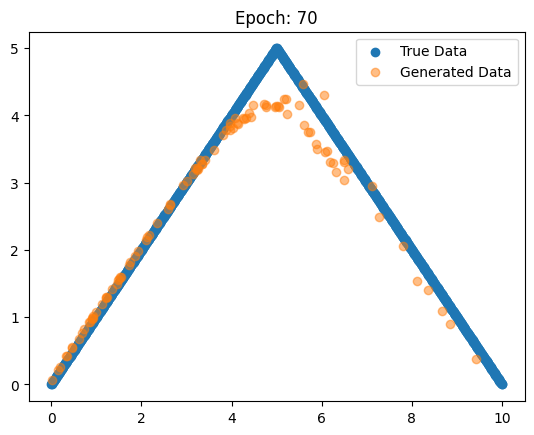

1/1 [==============================] - 0s 23ms/step
Epoch: 80 Loss D.: 0.541774570941925
Epoch: 80 Loss G.: 1.0912880897521973
4/4 [==============================] - 0s 3ms/step


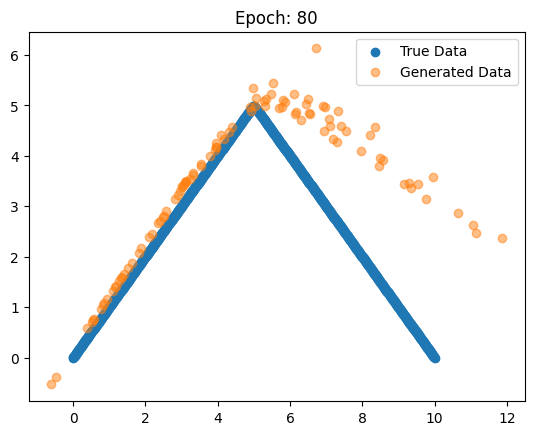

1/1 [==============================] - 0s 20ms/step
Epoch: 90 Loss D.: 0.507978081703186
Epoch: 90 Loss G.: 1.163029670715332
4/4 [==============================] - 0s 2ms/step


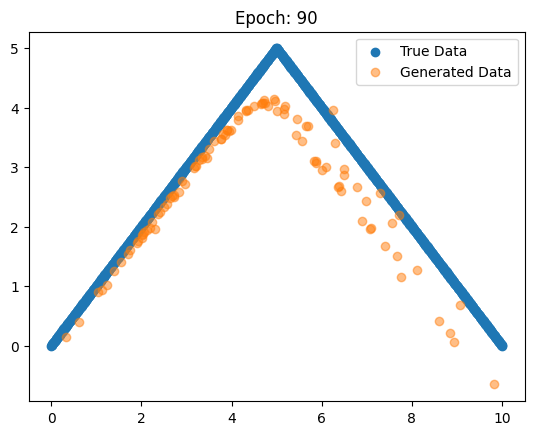

1/1 [==============================] - 0s 19ms/step


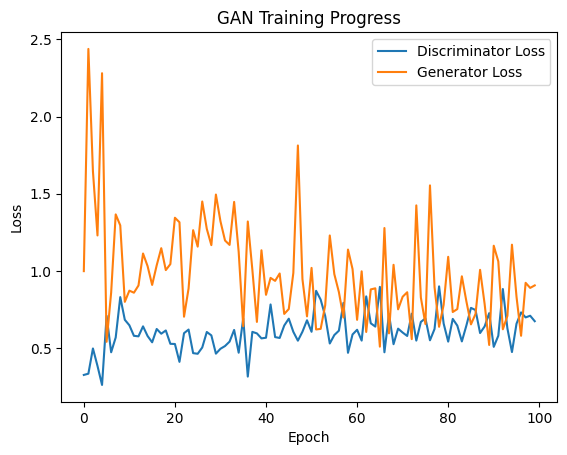

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam

# Function to generate true data
def true_data(n_samples):
    x = np.linspace(0, 10, n_samples)
    y = np.abs(5 - np.abs(x % 10 - 5))
    return np.column_stack((x, y))

# Discriminator model
def build_discriminator():
    model = Sequential()
    model.add(Dense(256, input_dim=2))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Generator model
def build_generator():
    model = Sequential()
    model.add(Dense(16, input_dim=2))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(2))
    return model

# Compile models
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

generator = build_generator()
discriminator.trainable = False

gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001))

# Training parameters
batch_size = 32
num_epochs = 100

# Generate true data
train_data = true_data(1024)

# Lists to store losses for visualization
d_losses = []
g_losses = []

for epoch in range(num_epochs):
    # Shuffle and create batches
    np.random.shuffle(train_data)
    for n in range(0, len(train_data), batch_size):
        real_samples = train_data[n:n + batch_size]

        # Data for training the discriminator
        real_samples_labels = np.ones((batch_size, 1))
        latent_space_samples = np.random.randn(batch_size, 2)
        generated_samples = generator.predict(latent_space_samples)
        generated_samples_labels = np.zeros((batch_size, 1))
        all_samples = np.concatenate((real_samples, generated_samples))
        all_samples_labels = np.concatenate((real_samples_labels, generated_samples_labels))

        # Training the discriminator
        d_loss = discriminator.train_on_batch(all_samples, all_samples_labels)

        # Data for training the generator
        latent_space_samples = np.random.randn(batch_size, 2)

        # Training the generator
        g_loss = gan.train_on_batch(latent_space_samples, np.ones((batch_size, 1)))

    # Save losses for visualization
    d_losses.append(d_loss[0])
    g_losses.append(g_loss)

    # Show loss
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} Loss D.: {d_loss[0]}")
        print(f"Epoch: {epoch} Loss G.: {g_loss}")

    # Visualize generated samples after each epoch
    if epoch % 10 == 0:
        latent_space_samples = np.random.randn(100, 2)
        generated_samples = generator.predict(latent_space_samples)

        plt.scatter(train_data[:, 0], train_data[:, 1], label='True Data')
        plt.scatter(generated_samples[:, 0], generated_samples[:, 1], label='Generated Data', alpha=0.5)
        plt.legend()
        plt.title(f'Epoch: {epoch}')
        plt.show()

# Plot losses over epochs
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GAN Training Progress')
plt.show()
